<a href="https://colab.research.google.com/github/marcmacias96/PythonMachineLearning/blob/master/Examen_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen Primer parcial IA-2**

---
Conjunto de datos sobre los 50 libros más vendidos de Amazon de 2009 a 2019. Contiene 550 libros,
los datos se han clasificado en ficción y no ficción usando Goodreads
Goodreads: Es la mayor red de lectores y recomendaciones de libros. Comunidad web donde los
lectores y usuarios pueden mantener un registro de sus libros, sus hábitos de lectura y revisar y
evaluar los libros. Esta página web permite a los usuarios darse de alta y seleccionar libros del
catálogo de la propia página para crear sus propias librerías virtuales en su perfil y listas de lecturas.
También permite a sus miembros crear sus propios grupos de sugerencia y discusión de libros y
autores.
Columnas
Nombre del libro, Autor del Libro, Clasificación de los usuarios de Amazon, Número de reseñas
escritas sobre Amazon, Precio del libro (Al 13/10/2020), El año(s) en que se clasificó en el Bestseller,
Es de ficción o no ficción


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/IA/Examen Primer Parcial/Libros_x_categorias.csv')


# **1) Análisis exploratorio de datos**
---

a.   Explorar la tendencia a lo largo del año para cada género:

*   Número de libros más vendidos en cada género cada año:
*   Precio promedio, reseñas y calificación de los usuarios a lo largo del año por género


# Número de libros más vendidos en cada género cada año:

---



In [4]:
#separamos por categorias
df_non_fic = dataset[dataset['Genre'] == 'Non Fiction']
df_non_fic.drop(['Name','Author','Reviews','Price'],1)
df_fic = dataset[dataset['Genre'] == 'Fiction']
df_fic.drop(['Name','Author','Reviews','Price'],1)

,User Rating,Year,Genre
1,4.6,2011,Fiction
3,4.7,2017,Fiction
5,4.4,2011,Fiction
6,4.7,2014,Fiction
7,4.7,2017,Fiction
...,...,...,...
541,4.8,2014,Fiction
542,4.8,2015,Fiction
543,4.8,2016,Fiction
544,4.8,2017,Fiction


In [5]:
#agrupamos por año y normalizamos
#Primera categoria
df_fic_byyear = df_fic.groupby(['Year']).mean()

mm_scaler = preprocessing.MinMaxScaler()
df_fic_mm = mm_scaler.fit_transform(df_fic_byyear)
df_fic_mm = pd.DataFrame(df_fic_mm, columns=df_fic_byyear.columns)
df_fic_mm.index = df_fic_byyear.index

#segunda categoria
df_non_fic_byyear = df_non_fic.groupby(['Year']).mean()

mm_scaler = preprocessing.MinMaxScaler()
df_non_fic_mm = mm_scaler.fit_transform(df_non_fic_byyear)
df_non_fic_mm = pd.DataFrame(df_non_fic_mm, columns = df_non_fic_byyear.columns)
df_non_fic_mm.index = df_non_fic_byyear.index

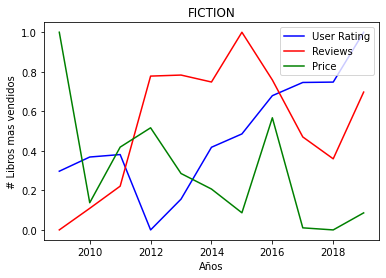

In [6]:
#graficamos la primera categoria
plt.plot(df_fic_mm.index,df_fic_mm['User Rating'], color='b', label = 'User Rating')
plt.plot(df_fic_mm.index,df_fic_mm['Reviews'], color='r',label = 'Reviews')
plt.plot(df_fic_mm.index,df_fic_mm['Price'], color='g',label = 'Price')
plt.xlabel('Años')
plt.ylabel('# Libros mas vendidos')
plt.title('FICTION')
plt.legend()
plt.show()

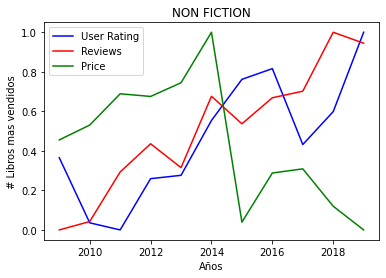

In [7]:
#Graficamos la segunda categoria
plt.plot(df_non_fic_mm.index,df_non_fic_mm['User Rating'], color='b', label = 'User Rating')
plt.plot(df_non_fic_mm.index,df_non_fic_mm['Reviews'], color='r',label = 'Reviews')
plt.plot(df_non_fic_mm.index,df_non_fic_mm['Price'], color='g',label = 'Price')
plt.xlabel('Años')
plt.ylabel('# Libros mas vendidos')
plt.title('NON FICTION')
plt.legend()
plt.show()

# Precio promedio, reseñas y calificación de los usuarios a lo largo del año por género

---



In [8]:
df_non_fic_byyear = df_non_fic.groupby(['Year']).mean()
df_non_fic_byyear

,User Rating,Reviews,Price
Year,,,
2009,4.576923,3026.230769,15.230769
2010,4.520000,3526.533333,16.000000
2011,4.513793,6482.758621,17.620690
2012,4.558621,8162.931034,17.482759
2013,4.561538,6739.346154,18.192308
2014,4.609524,10994.952381,20.809524
2015,4.645455,9353.484848,10.969697
2016,4.654839,10906.387097,13.516129
2017,4.588462,11297.538462,13.730769


In [9]:
df_non_fic_byyear = df_non_fic.groupby(['Year']).mean()
df_non_fic_byyear

,User Rating,Reviews,Price
Year,,,
2009,4.576923,3026.230769,15.230769
2010,4.520000,3526.533333,16.000000
2011,4.513793,6482.758621,17.620690
2012,4.558621,8162.931034,17.482759
2013,4.561538,6739.346154,18.192308
2014,4.609524,10994.952381,20.809524
2015,4.645455,9353.484848,10.969697
2016,4.654839,10906.387097,13.516129
2017,4.588462,11297.538462,13.730769



# **b. Analizar las variables por autor**
---

* Construir la tabla de autores
* Definir función para contar el número de libros que un autor tiene en la lista de best-sellers:
* **Lista** de autores con al menos 3 libros más vendidos:



# Construir la tabla de autores
---



In [10]:
autores = dataset['Author']
autores.to_csv('Author.csv')
autores

0                      JJ Smith
1                  Stephen King
2            Jordan B. Peterson
3                 George Orwell
4      National Geographic Kids
                 ...           
545                 Jeff Kinney
546                 Jen Sincero
547                 Jen Sincero
548                 Jen Sincero
549                 Jen Sincero
Name: Author, Length: 550, dtype: object

# Definir función para contar el número de libros que un autor tiene en la lista de best-sellers:

---



In [11]:
def author_best_seller(best_sellers_list):
  n = best_sellers_list['Author'].value_counts()
  return n

In [12]:
dataset['best_sellers'] = dataset['Reviews']*dataset['Price']
df_best_sellers = dataset.drop(['Name','Reviews','Price','User Rating','Genre','Year'],1).sort_values(by='best_sellers',ascending=False)
df_best_sellers = df_best_sellers.drop(df_best_sellers[df_best_sellers['best_sellers']==0].index)

df_best_sellers

,Author,best_sellers
382,Paula Hawkins,1430028
338,Paulo Coelho,1396161
534,Delia Owens,1317615
70,American Psychiatric Association,701295
69,American Psychiatric Association,701295
...,...,...
300,Zhi Gang Sha,3740
264,Rick Riordan,1096
11,Larry Schweikart,920
91,David Zinczenko,720


In [13]:
data_book = author_best_seller(df_best_sellers) 
data_book.to_csv('Best_Sellers_Books.csv')
data_book.head()

Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Name: Author, dtype: int64


# Lista de autores con al menos 3 libros más vendidos:
---


In [14]:
data_book = pd.read_csv("Best_Sellers_Books.csv")
df_list = data_book[data_book['Author'] >= 3]
df_list.shape
df_list.head()

,Unnamed: 0,Author
0,Suzanne Collins,11
1,Gary Chapman,11
2,Rick Riordan,11
3,American Psychological Association,10
4,Dr. Seuss,9


# **c. Distribuciones variables**

---

* Explorar la distribución de Price


# Explorar la distribución de Price

---



In [15]:
#Debemos ver cómo interpreta Pandas los datos, es decir, qué tipo de dato le asigna a cada uno.
print(dataset.dtypes)
dataset['Price'].describe()

Name             object
Author           object
User Rating     float64
Reviews           int64
Price             int64
Year              int64
Genre            object
best_sellers      int64
dtype: object


count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

Text(0, 0.5, 'Conteo')

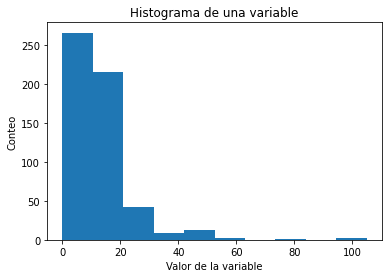

In [16]:
#Crear un histograma para ver la distribución de una variable. Escogemos Price
dataset['Price'].plot.hist()
plt.title('Histograma de una variable')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


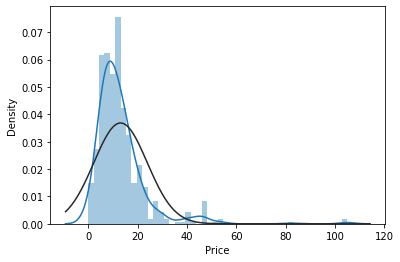

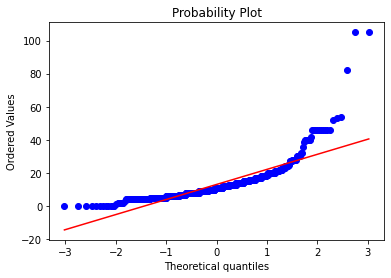

In [17]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(dataset['Price'], fit = norm);
fig = plt.figure()
res = stats.probplot(dataset['Price'], plot = plt)

In [18]:
#De estos gráficos se desprende que 'Price' no conforma una distribución normal. Muestra picos, asimetría positiva y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema.
#como price es entero existen valor de 0 y negativos al momento de transformar la data para que se adecue a la normal
#por ese motivo transformamos el dato a float64
dataset['Price'] = dataset['Price'].astype(np.float64)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


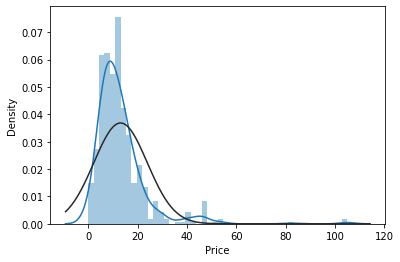

In [19]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:
sns.distplot(dataset['Price'], fit = norm)


In [20]:
from scipy import stats
#Otra forma de asegurarse de que se sigue una distribución normal es realizando un test de normalidad.
columnas_numericas = dataset.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(dataset[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna User Rating no sigue una distribución normal
Columna Reviews no sigue una distribución normal
Columna Price no sigue una distribución normal
Columna Year no sigue una distribución normal
Columna best_sellers no sigue una distribución normal


In [21]:
#Trasformamos user rating a normal
# Transformación de los datos:
dataset['User Rating'] = np.log(dataset['User Rating'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


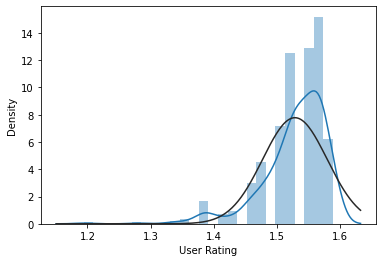

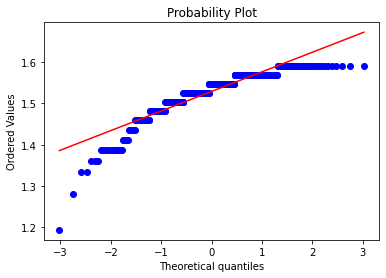

In [22]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados para User Rating:

sns.distplot(dataset['User Rating'], fit = norm);
fig = plt.figure()
res = stats.probplot(dataset['User Rating'], plot = plt)

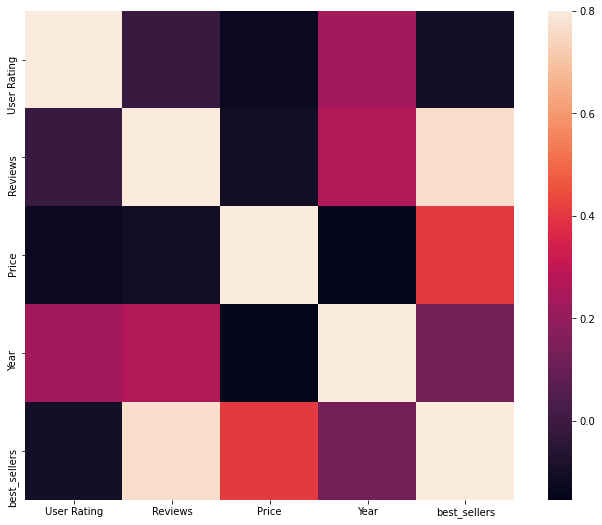

In [23]:
# Matriz de correlación:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# **d.Explorando las relaciones entre las variables a través del conjunto de datos**

---
* Relación entre las revisiones y la clasificación de los usuarios, comparada con el género:
* Explorar la relación entre el precio y la valoración de los usuarios, comparada con el género:


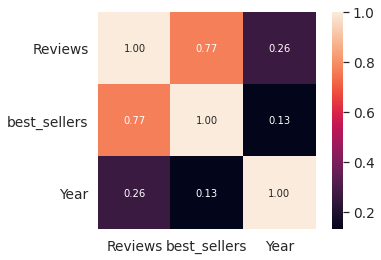

In [24]:
# Matriz de correlación
k = 3 # Número de variables.
cols = corrmat.nlargest(k, 'Reviews')['Reviews'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

# Relación entre las revisiones y la clasificación de los usuarios, comparada con el género:
---


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


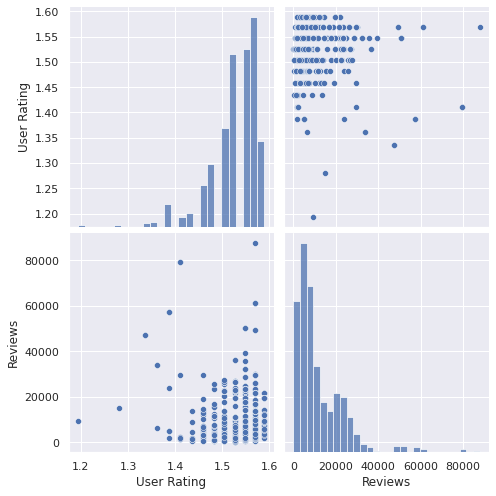

In [25]:
sns.set()
cols = ['User Rating', 'Reviews', 'Genre']
sns.pairplot(dataset[cols], size = 3.5)
plt.show();

# Explorar la relación entre el precio y la valoración de los usuarios, comparada con el género:

---



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


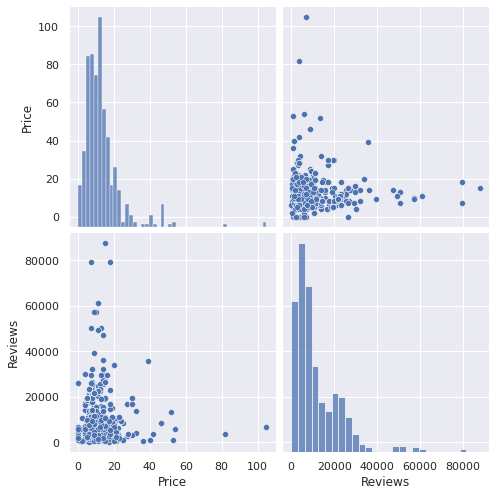

In [26]:
sns.set()
cols = ['Price', 'Reviews', 'Genre']
sns.pairplot(dataset[cols].round(1), size = 3.5)
plt.show();

# **e. Explorar las relaciones entre las variables cuando son agrupadas por el autor**


---

* Explora la relación entre el total de reseñas que tiene un autor y la calificación promedio
de usuario de ese autor.
* Explorar la relación entre el precio promedio de los libros más vendidos de un autor y la
calificación de usuario promedio de ese autor.


#  Explora la relación entre el total de reseñas que tiene un autor y la calificación promedio de usuario de ese autor




In [ ]:
libros_dataframe = dataset
libros_dataframe = libros_dataframe.drop(['Name'], axis=1)
libros_dataframe

In [29]:
#Formamos nustras series con los datos que necesitamos
autores_series_rating = libros_dataframe.iloc[:][['Author','User Rating']]
autores_series_reviews = libros_dataframe.iloc[:][['Author','Reviews']]
autores_rating_mean_series = autores_series_rating.groupby(['Author']).mean()
autores_reviws_count_series = autores_series_reviews.groupby(['Author']).sum()
review_counts_vs_rating_mean = pd.merge(autores_rating_mean_series,autores_reviws_count_series, on='Author')
review_counts_vs_rating_mean

,User Rating,Reviews
Author,,
Abraham Verghese,1.526056,9732
Adam Gasiewski,1.481605,3113
Adam Mansbach,1.568616,9568
Adir Levy,1.568616,8170
Admiral William H. McRaven,1.547563,10199
...,...,...
Walter Isaacson,1.518730,18668
William Davis,1.481605,14994
William P. Young,1.526056,39440


In [30]:
#Normalizamos el dataset
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(review_counts_vs_rating_mean)
review_counts_vs_rating_mean_mm = pd.DataFrame(x_mm, columns=['User Rating','Reviews'])
review_counts_vs_rating_mean_mm.index = review_counts_vs_rating_mean.index
review_counts_vs_rating_mean_mm

,User Rating,Reviews
Author,,
Abraham Verghese,0.723214,0.034074
Adam Gasiewski,0.528471,0.010271
Adam Mansbach,0.909667,0.033484
Adir Levy,0.909667,0.028457
Admiral William H. McRaven,0.817432,0.035753
...,...,...
Walter Isaacson,0.691117,0.066209
William Davis,0.528471,0.052997
William P. Young,0.723214,0.140910


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


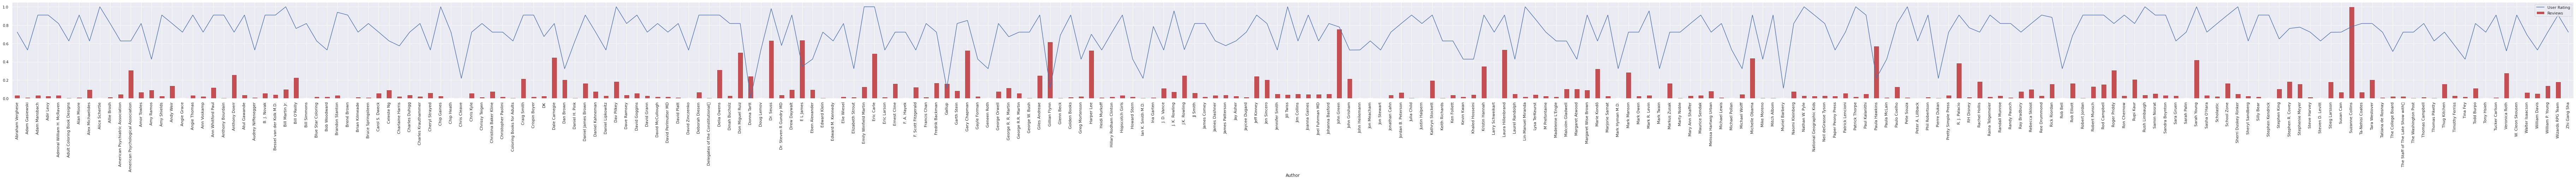

In [31]:
#Graficamos 
plt.rcParams["figure.figsize"] = [130,5]
fig = plt.figure()
review_counts_vs_rating_mean_mm['User Rating'].plot(kind = 'line')
review_counts_vs_rating_mean_mm['Reviews'].plot(kind = 'bar', color='r')
plt.legend()



# Explorar la relación entre el precio promedio de los libros más vendidos de un autor y la calificación de usuario promedio de ese autor.



In [32]:
#Formamos nustras series con los datos que necesitamos
#Precio promedio de los libros mas vendidos por el autor
autores_series_price = libros_dataframe.iloc[:][['Author','Price']]
autores_series_price = autores_series_price.sort_values(by=['Price'], ascending=False, ignore_index=True)
autores_series_price = autores_series_price.iloc[:11]
autores_price_mean_series = autores_series_price.groupby(['Author']).mean()
autores_price_mean_series

,Price
Author,
American Psychiatric Association,105.0
American Psychological Association,46.0
Bill Simmons,53.0
J. K. Rowling,52.0
Lin-Manuel Miranda,54.0
Stephenie Meyer,82.0


In [33]:
autores_series_rating = libros_dataframe.iloc[:][['Author','User Rating']]
autores_series_rating_series = autores_series_rating.groupby(['Author']).mean()
autores_series_rating_series = pd.merge(autores_series_rating_series,autores_price_mean_series, on ='Author')
autores_series_rating_series

,User Rating,Price
Author,,
American Psychiatric Association,1.504077,105.0
American Psychological Association,1.504077,46.0
Bill Simmons,1.547563,53.0
J. K. Rowling,1.578926,52.0
Lin-Manuel Miranda,1.589235,54.0
Stephenie Meyer,1.538346,82.0


In [34]:
#Normalizamos el dataset
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(autores_series_rating_series)
analisis = pd.DataFrame(x_mm, columns=['User Rating','Price'])


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

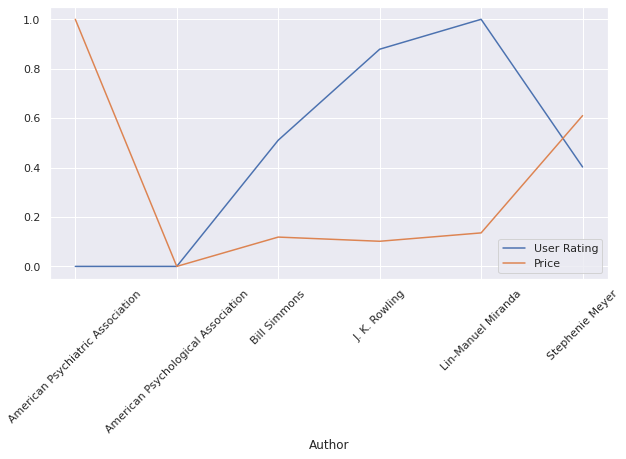

In [35]:
analisis.index =  autores_series_rating_series.index
analisis.plot(figsize= [10,5])
plt.xticks(rotation=45)


# **Predecir – Modelo de Machine Learning**
---

*   Todos los datos deben ser numéricos para entrenar y probar la red
*   La salida es determinar cuál es el autor de un libro
*   Dividir las características de entrada y de destino
*   Codificar de las etiquetas
*   Dividir datos de entrenamiento y prueba
*   Entrenar el modelo y encontrar su precisión >= 85,6
*   Predecir 



In [86]:
libros_dataframe = dataset
libros_dataframe = libros_dataframe.drop(['Name'], axis=1)
libros_dataframe

,Author,User Rating,Reviews,Price,Year,Genre,best_sellers
0,JJ Smith,1.547563,17350,8.0,2016,Non Fiction,138800
1,Stephen King,1.526056,2052,22.0,2011,Fiction,45144
2,Jordan B. Peterson,1.547563,18979,15.0,2018,Non Fiction,284685
3,George Orwell,1.547563,21424,6.0,2017,Fiction,128544
4,National Geographic Kids,1.568616,7665,12.0,2019,Non Fiction,91980
...,...,...,...,...,...,...,...
545,Jeff Kinney,1.589235,9413,8.0,2019,Fiction,75304
546,Jen Sincero,1.547563,14331,8.0,2016,Non Fiction,114648
547,Jen Sincero,1.547563,14331,8.0,2017,Non Fiction,114648
548,Jen Sincero,1.547563,14331,8.0,2018,Non Fiction,114648


In [45]:
#Creo mis variables x y dummys

dummys_year = pd.get_dummies(libros_dataframe['Year'])
dummys_sex = pd.get_dummies(libros_dataframe['Genre'])
series = c[['User Rating','Reviews','Price']]
x = pd.concat([series,dummys_year,dummys_sex], axis=1)

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(libros_dataframe['Author'])
x

,User Rating,Reviews,Price,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Fiction,Non Fiction
0,1.547563,17350,8.0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1.526056,2052,22.0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1.547563,18979,15.0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.547563,21424,6.0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.568616,7665,12.0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.589235,9413,8.0,0,0,0,0,0,0,0,0,0,0,1,1,0
546,1.547563,14331,8.0,0,0,0,0,0,0,0,1,0,0,0,0,1
547,1.547563,14331,8.0,0,0,0,0,0,0,0,0,1,0,0,0,1
548,1.547563,14331,8.0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [38]:
#Normalizamos el dataset
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)
x = pd.DataFrame(x_mm, columns=x.columns)

In [39]:
#dividimos nuestros datos entre los de entrenamiento y de pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0, train_size= 0.75)

In [40]:
#Entrenamos el modelo
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [41]:
#calculamos el score
tree_one_accuracy = round(tree_one.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.4058


In [42]:
#Predecimos
predictions = tree_one.predict(x_test)

In [43]:
#Random Forest
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)
y_pred = randForest.predict(x_test)

# **Prediccion de Genero**

In [139]:
x2 = libros_dataframe[['Reviews','Price','Year','best_sellers']]
autors = pd.DataFrame(label_encoder.fit_transform(libros_dataframe['Author']), columns=['author'])
x2 = pd.concat([x2,autors], axis=1)
y2 = libros_dataframe

y2= libros_dataframe["Genre"].astype('category')
y2 = y2.cat.codes


In [149]:
#Normalizamos el dataset
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(x2)
x2 = pd.DataFrame(x_mm, columns=x2.columns)
x2

,Reviews,Price,Year,best_sellers,author
0,0.197178,0.076190,0.7,0.097061,0.461538
1,0.022949,0.209524,0.2,0.031569,0.886640
2,0.215730,0.142857,0.9,0.199077,0.542510
3,0.243577,0.057143,0.8,0.089889,0.384615
4,0.086875,0.114286,1.0,0.064320,0.704453
...,...,...,...,...,...
545,0.106783,0.076190,1.0,0.052659,0.485830
546,0.162794,0.076190,0.7,0.080172,0.489879
547,0.162794,0.076190,0.8,0.080172,0.489879
548,0.162794,0.076190,0.9,0.080172,0.489879


In [157]:
#dividimos nuestros datos entre los de entrenamiento y de pruebas
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.05, random_state = 0, train_size= 0.95)

In [158]:
#Random Forest
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)
y_pred = randForest.predict(x_test)

In [159]:
#calculamos el score
tree_one_accuracy = round(randForest.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.8571


In [165]:
#Predecimos
predictions = tree_one.predict(x_test)
predictions = pd.DataFrame(predictions, columns=['predict'])
print(predictions.value_counts())
print(y_test.value_counts())


predict
1          19
0           9
dtype: int64
1    17
0    11
dtype: int64
